In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

# Load the dataset
file_path = 'Employee.csv'
data = pd.read_csv(file_path)

# -------------------- Data Exploration --------------------
# List unique values and their lengths for each feature
unique_values = {col: {'unique_values': data[col].unique(), 'length': len(data[col].unique())} for col in data.columns}
print("Unique Values and Lengths:\n", unique_values)

# Perform statistical analysis
stats = data.describe(include='all')
print("\nStatistical Analysis:\n", stats)

# Rename columns (strip whitespace, lowercase, and replace spaces with underscores)
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]
print("\nRenamed Columns:\n", data.columns)

Unique Values and Lengths:
 {'Company': {'unique_values': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object), 'length': 7}, 'Age': {'unique_values': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.]), 'length': 30}, 'Salary': {'unique_values': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.]), 'length': 41}, 'Place': {'unique_values': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object), 'length': 12}, 'Country': {'unique_values'

In [32]:
# -------------------- Data Cleaning --------------------
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('Employee.csv')

# 1. Replace 0 in 'age' with NaN
data['Age'] = data['Age'].replace(0, np.nan)

# 2. Handle missing values for numerical and categorical columns
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Numerical columns
        data[column].fillna(data[column].mean(), inplace=True)  # Replace with mean
    else:  # Categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)  # Replace with mode

# 3. Remove duplicate rows
data = data.drop_duplicates()

# 4. Find and remove outliers using IQR
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# 5. Print missing values count after treatment
print("\nMissing Values After Treatment:\n")
print(data.isnull().sum())


Missing Values After Treatment:

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_984\4180005775.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)  # Replace with mode
C:\Users\user\AppData\Local\Temp\ipykernel_984\4180005775.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b


Filtered Data:
      company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


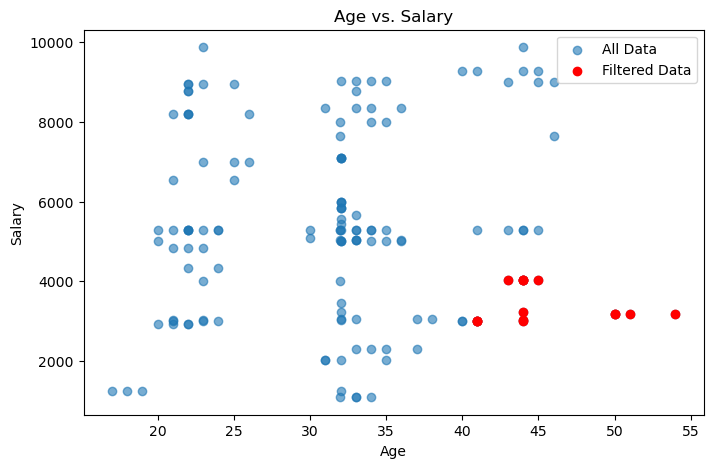


People Count by Place:
 place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


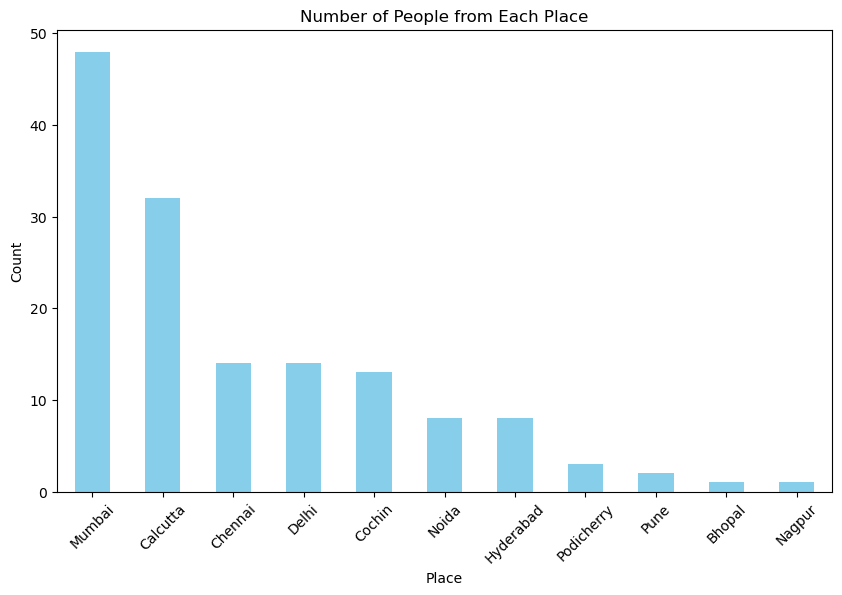

In [5]:
# -------------------- Data Analysis --------------------
# Filter data: age > 40 and salary < 5000
if 'age' in data.columns and 'salary' in data.columns:
    filtered_data = data[(data['age'] > 40) & (data['salary'] < 5000)]
    print("\nFiltered Data:\n", filtered_data)

    # Scatter plot: age vs. salary
    plt.figure(figsize=(8, 5))
    plt.scatter(data['age'], data['salary'], alpha=0.6, label="All Data")
    plt.scatter(filtered_data['age'], filtered_data['salary'], color='red', label="Filtered Data")
    plt.title('Age vs. Salary')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

# Count people from each place
if 'place' in data.columns:
    place_counts = data['place'].value_counts()
    print("\nPeople Count by Place:\n", place_counts)

    # Bar chart
    plt.figure(figsize=(10, 6))
    place_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of People from Each Place')
    plt.xlabel('Place')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [7]:
# -------------------- Data Encoding --------------------
# One-hot encoding for categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Label encoding (as an alternative for categorical columns)
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print("\nData After Encoding:\n", data.head())


Data After Encoding:
    company   age       salary  place  country  gender
0        4  20.0  5283.471074      2        0       0
1        2  30.0  5283.471074      6        0       0
2        4  35.0  2300.000000      1        0       0
3        2  40.0  3000.000000      4        0       0
4        4  23.0  4000.000000      6        0       0


In [9]:
# -------------------- Feature Scaling --------------------
# Standard Scaler
scaler = StandardScaler()
scaled_data_std = scaler.fit_transform(data.select_dtypes(include=np.number))

# MinMax Scaler
minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(data.select_dtypes(include=np.number))

# Convert back to DataFrame for inspection
scaled_std_df = pd.DataFrame(scaled_data_std, columns=data.select_dtypes(include=np.number).columns)
scaled_minmax_df = pd.DataFrame(scaled_data_minmax, columns=data.select_dtypes(include=np.number).columns)

print("\nStandard Scaled Data (Sample):\n", scaled_std_df.head())
print("\nMinMax Scaled Data (Sample):\n", scaled_minmax_df.head())


Standard Scaled Data (Sample):
     company       age    salary     place  country    gender
0  0.991489 -1.467376  0.000000 -0.893255      0.0 -0.534522
1 -0.239325 -0.248759  0.000000  0.750562      0.0 -0.534522
2  0.991489  0.360549 -1.264122 -1.304209      0.0 -0.534522
3 -0.239325  0.969858 -0.967526 -0.071346      0.0 -0.534522
4  0.991489 -1.101791 -0.543818  0.750562      0.0 -0.534522

MinMax Scaled Data (Sample):
    company       age    salary  place  country  gender
0      0.8  0.081081  0.477350    0.2      0.0     0.0
1      0.4  0.351351  0.477350    0.6      0.0     0.0
2      0.8  0.486486  0.137817    0.1      0.0     0.0
3      0.4  0.621622  0.217480    0.4      0.0     0.0
4      0.8  0.162162  0.331285    0.6      0.0     0.0
